In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_regression
import matplotlib.lines as mlines
from sklearn.model_selection import train_test_split
%matplotlib notebook

###### Linear Projection

Projection equation:
$$ (b-a\beta)$$

- $\beta$ is our scaler and the point is that we want a scaled version of this line to be as close to b without leaving the line. Therefore, the closest point would be where $b$ meets $a$ at a 90 degree angle.

If **b** is orthogonal/perpendicular to **$a\beta$** we know that their dot prodict must equal zero:
$$ a^{T}(b-a\beta) = 0$$
$$ a^{T}b - a^{T}a\beta = 0$$
$$ a^{T}a\beta = a^{T}b $$

Because we are dealing with dot products of vectors we can divide them (cannot divide matrices):

$$ \beta = \frac{a^{T}b}{a^{T}a} $$


<IPython.core.display.Javascript object>


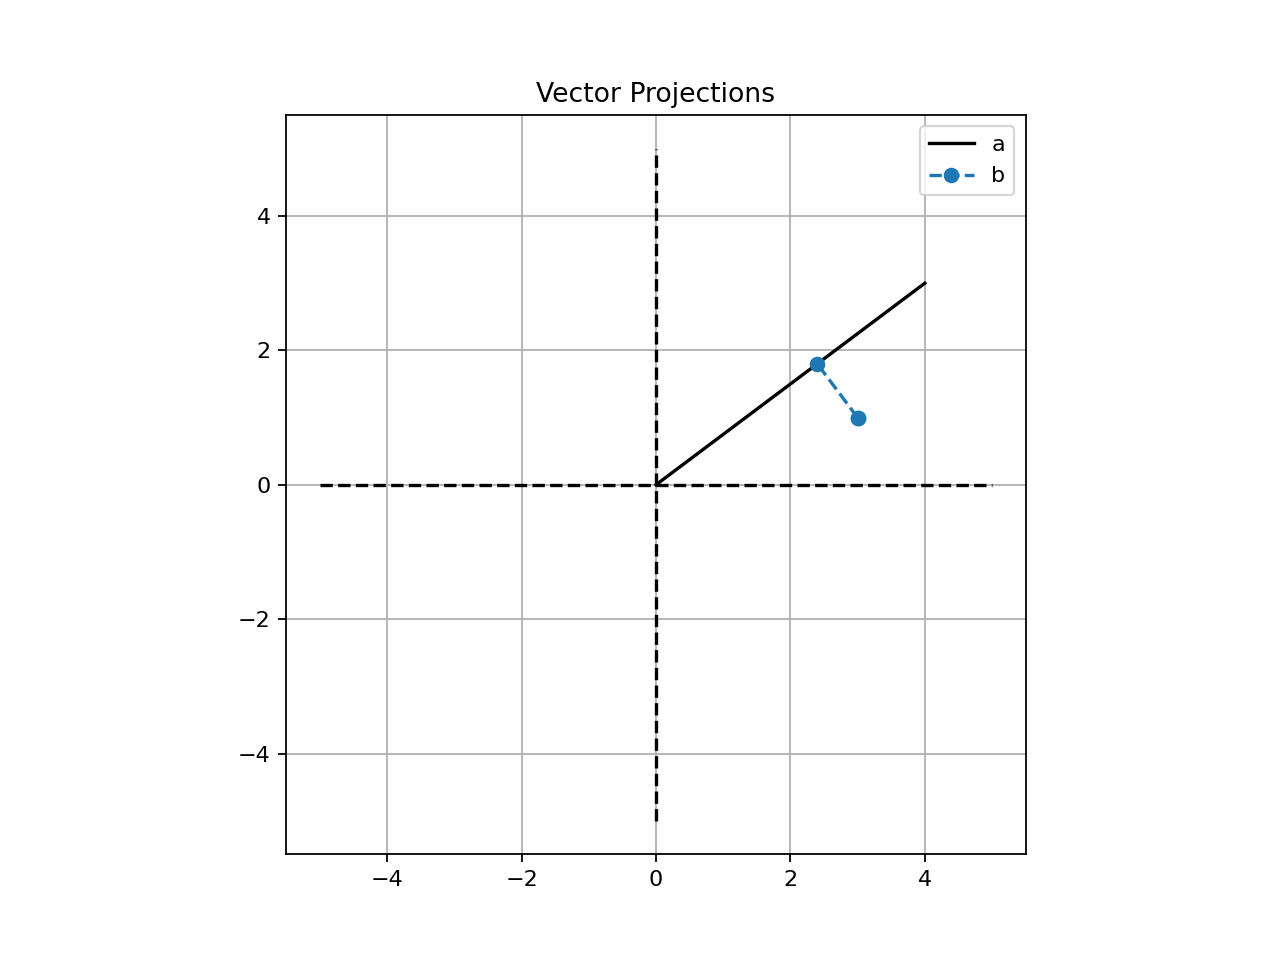

In [26]:
a = np.array([4,3])
b = np.array([3,1])
plt.figure(figsize=(8, 6), dpi=80)

beta = (a.T@b) / (a.T@a)
plt.plot([0,a[0]],[0,a[1]],'black')
plt.scatter(b[0],b[1])
plt.plot([b[0], beta*a[0]],[b[1], beta*a[1]],'o--')
plt.plot([-5,5],[0,0],'k--')
plt.plot([0,0],[-5,5],'k--')
plt.grid()
plt.axis('square')
plt.title('Vector Projections')
plt.legend(['a','b'])

##### Projection onto a subspace
Projection equation:
$$ A^{T}(b-Ax) = 0$$
$$ A^{T}b - A^{T}Ax = 0$$
$$ A^{T}Ax = A^{T}b $$
$$ A^{T}Ax = A^{T}b $$

- Now we cannot divide matrices but we can take the left inverse

$$ (A^{T}A)^{-1}A^{T}Ax = (A^{T}A)^{-1} A^{T}b $$
$$ x = (A^{T}A)^{-1} A^{T}b $$

$$  = (A^{T}A)^{-1} A^{T}b $$

$$\hat{\theta} = (X^TX)^{-1}X^{T}y$$

<IPython.core.display.Javascript object>


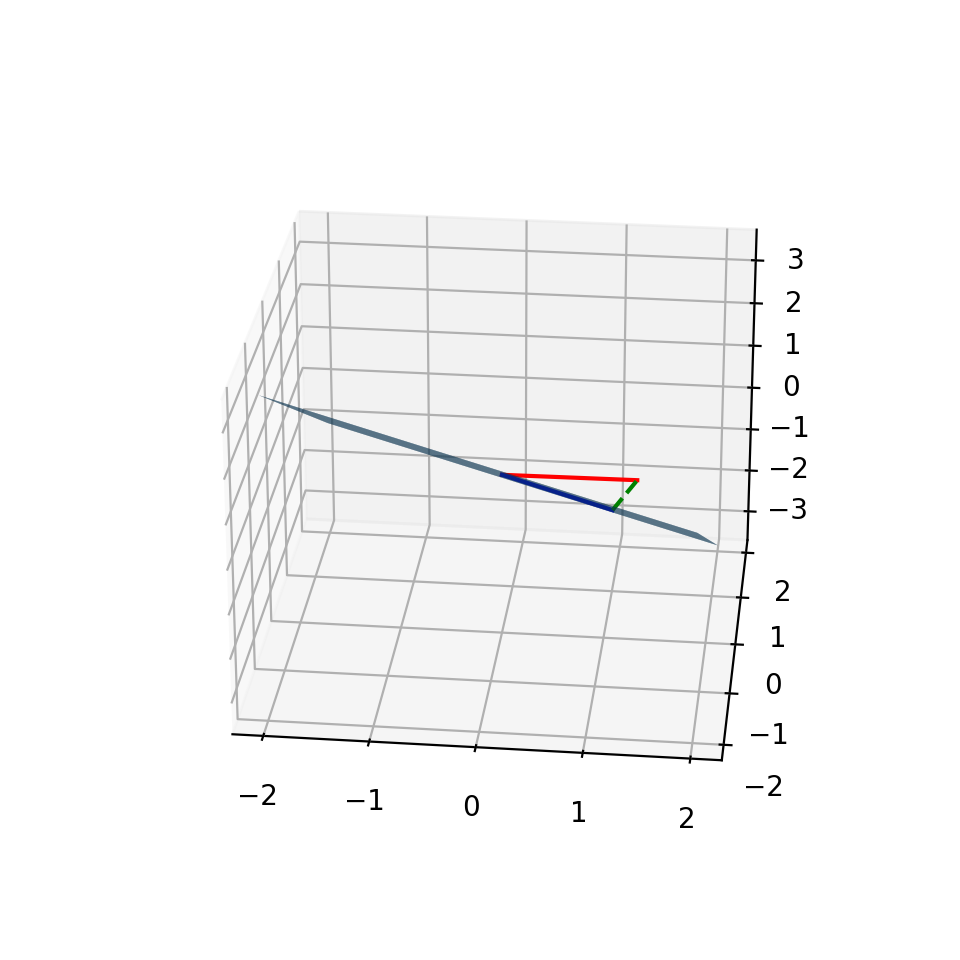

In [11]:
m = 3
n = 2

b = np.random.randn(m,1)
A = np.random.randn(m,n)

x = np.linalg.solve(A.T@A,A.T@b)
Ax = A@x

fig= plt.figure(figsize = plt.figaspect(1))
ax = fig.gca(projection = '3d')

ax.plot([0,b[0]],[0,b[1]],[0,b[2]],'r')
ax.plot([0,Ax[0]],[0,Ax[1]],[0,Ax[2]],'b')

ax.plot([Ax[0][0],b[0]],
       [Ax[1][0],b[1]],
       [Ax[2][0],b[2]],'g--')

xx,yy = np.meshgrid(np.linspace(-2,2),np.linspace(-2,2))
cp = np.cross(A[:,0],A[:,1])
z1 = (-cp[0]*xx - cp[1]*yy)*1./cp[2]
ax.plot_surface(xx,yy,z1)

# Matrix Decomposition
$$A = CR$$
$$A = LU$$ 
$$A = V \Lambda V^{-1}$$
$$S = Q \Lambda Q^{T}$$
$$A = U \Sigma V^{T}$$

- Orthonormal means unit length and orthogonal denoted as $Q$
$$Q^{-1} = Q^{T}$$
$$QQ^{-1} = QQ^{T} = Q^{-1}Q = Q^{T}Q$$

# Singular Value Decomposition (SVD)

- Decompositing our X matrix and represent it as a product of three differnet matrices
  
  
- Normally the starting point for data reduction  
  
  
- Use it to solve linear systems of equation $Ax = b$ for non-square $A$ matrices  
  
  
- Basis for Principal component analysis

$$\overline{\underline{X}} = \begin{bmatrix}
        \vdots & \vdots  & \cdots &\vdots           \\[0.3em]
       \vdots & \vdots  & \cdots &\vdots           \\[0.3em]
       x_1 & x_2    & \cdots       & x_m \\[0.3em]
       \vdots & \vdots  & \cdots &\vdots \\[0.3em]
       \vdots & \vdots  & \cdots &\vdots 
     \end{bmatrix}_{mxn} = U \Sigma V^{T} =  \begin{bmatrix}
       \vdots & \vdots  & \cdots &\vdots           \\[0.3em]
       \vdots & \vdots  & \cdots &\vdots           \\[0.3em]
       u_1 & u_2    & \cdots       & u_n \\[0.3em]
       \vdots & \vdots  & \cdots &\vdots \\[0.3em]
       \vdots & \vdots  & \cdots &\vdots
     \end{bmatrix} _{nxn} = \begin{bmatrix}
       \sigma_1 &   &            \\[0.3em]
       & \ddots    &    \\[0.3em]
       & & \sigma_m\\[0.3em]
       \hline
       & 0 
     \end{bmatrix} _{nxm} = \begin{bmatrix}
       \vdots & \vdots  & \cdots &\vdots           \\[0.3em]
       v_1 & v_2  & \cdots &v_m           \\[0.3em]
       \vdots & \vdots  & \cdots &\vdots    
     \end{bmatrix} _{mxm} $$
     
- $U$ forms the orthonormal basis of the column space of $\overline{\underline{X}}$ and is hierarchically ordered by importance in terms of their ability to describe the variance in the columns of $\overline{\underline{X}}$. It is comprised of the eigenvalues of $\overline{\underline{X}}^{T}\overline{\underline{X}}$.
- $\Sigma$ is a diagonal matrix that is hierarchically ordered eigenvalues. Symetric and positive definite meaning we will have n postive real eigenvalues
- $V$ forms the orthonormal basis of the row space of $\overline{\underline{X}}$ and is hierarchically ordered. It provides the eigen mixture of $U$ that adds up to $\overline{\underline{X}}$ scaled by $\Sigma$. It is comprised of the eigenvalues of $\overline{\underline{X}}\overline{\underline{X}}^{T}$.

Important to know:  

$$UU^{T} = U^{T}U = I$$
  
$$VV^{T} = V^{T}V = I$$

### Truncation
- Additionally we can truncate at r (throw away all the low energy $\sigma$ values)  
  
  
- Only keeping the first $r$ columns of $U$ and $r$ columns of $V$ and a $rxr$ submatrix of $\Sigma$ 

$$\approx \tilde{U} \tilde{\Sigma} \tilde{V}^{T}$$

- This is the best rank r approximation of $\overline{\underline{X}}$

Very Important that after truncation:
$$\tilde{U}^{T}\tilde{U} = I$$
$$\tilde{U}\tilde{U}^{T} \neq I$$



# Dominant Correllations
- This is our correllation matrix among the columns of $\overline{\underline{X}}$
$$\overline{\underline{X}}^{T}\overline{\underline{X}} = \begin{bmatrix}
        \cdots & \cdots & x^{T}_1 & \cdots & \cdots  \\[0.1em]
       \cdots & \cdots & x^{T}_2 & \cdots & \cdots  \\[0.1em]
       & &\vdots & &   
     \end{bmatrix} \begin{bmatrix}
        \vdots &  \vdots & \vdots\\
        \vdots &  \vdots & \vdots\\
        x_1 & x_2 & \cdots \\
        \vdots & \vdots  & \vdots\\
        \vdots & \vdots  & \vdots\\
     \end{bmatrix}$$
     
$$ = \begin{bmatrix}
        x^{T}_1x_1 &  x^{T}_1x_2 & \cdots & x^{T}_1x_m\\
        x^{T}_0x_1 &  x^{T}_2x_2 & \cdots & x^{T}_2x_m\\
        \vdots & \vdots & \ddots &\vdots \\
        x^{T}_mx_1 &  x^{T}_mx_2 & \cdots & x^{T}_mx_m
     \end{bmatrix} $$
     
$$x^{T}_i x_j = \langle x_i,x_j \rangle$$

- Every entry is just the inner product of the corresponding two columns of $\overline{\underline{X}}$  
  
  
- The larger the inner product the more similar  
  
  
- Small inner product means the columns are nearly orthogonal and different  
  
  
- Since $\overline{\underline{X}}^{T}\overline{\underline{X}}$ is symmetric and positive semi-defininte because they are inner products: we will have non-negative real eigenvalues

### Finding $U \Sigma V$ for the economy SVD
$$\overline{\underline{X}}^{T} = V \hat{\Sigma} \hat{U}^{T}$$

$$\overline{\underline{X}}^{T}\overline{\underline{X}} = V \hat{\Sigma} \hat{U}^{T} \hat{U} \hat{\Sigma} V^{T} = V \hat{\Sigma}^{2} V^{T}$$

- This is the expression for the eigendecomposition of our correllation matrix  
  
  
- Where $\Sigma$ are our eigenvalues of our correllation matrix and $\Sigma$ and $V$ are our eigenvectors from our correllation matrix

#### Intuition (Computing SVD this way is inefficent but this is a good guide to understanding)

- The right singular values for $V$ are the eigenvectors of the columnwise correllation matrix  
  
  
- $\Sigma$ are the square roots of the same eigenvalues of the columnwise correllation matrix

$$\overline{\underline{X}}\overline{\underline{X}}^{T} = \hat{U} \hat{\Sigma} V^{T}  \hat{\Sigma} \hat{U}^{T} = \hat{U} \hat{\Sigma}^{2} \hat{U}^{T}$$

- The left singular values for $U$ are the eigenvectors of the columnwise correllation matrix  
  
  
- $\Sigma$ are the same square roots of the same eigenvalues of the columnwise correllation matrix



## Pseudoinverse
- Solving linear systems where $A$ and $b$ are known
$$Ax = b$$
$$A^{-1}Ax = A^{-1}b$$
$$x = A^{-1}b$$

- This only works where $A$ is a square and invertable matrix
- SVD allows us to generalise to non-sqaure $A$ matrices

Two common forms of our $A$ Matrix:

- Short and Fat (Underdetermined)
$$\begin{bmatrix}
       & & & & & & \\[0.1em]
       & & A & & \\[0.1em]
       & &  & &  \\
       & & & & & \\[0.1em]
     \end{bmatrix} \begin{bmatrix}
        \\[0.01em]
        \\[0.01em]
         \\[0.01em]
        \\[0.01em]
        x\\
        \\
        \\
        \\
        \\
     \end{bmatrix} = \begin{bmatrix}
        \\
        b\\
        \\
        \\
     \end{bmatrix}$$
- There is not enough measurements in b to uniquely determine a single unique solution x
- Therefore, there will be $\infty$ many solution x given b

Tall and Skinny (Overderdetermined)
$$\begin{bmatrix}
        & & & &  \\[0.1em]
       & & A &  \\[0.1em]
       & & & &  \\
       & & & &  \\[0.1em]
       & & & &  \\
       & & & &  \\
       & & & & 
     \end{bmatrix} \begin{bmatrix}
        \\[0.01em]
        x
        \\
        \\
     \end{bmatrix} = \begin{bmatrix}
        \\
        b\\
        \\
        \\
        \\
        \\
         \\
     \end{bmatrix}$$
- There will be zero solution in general for x given b


#### Moore Penrose Pseudoinverse (showing left pseudoinverse)
SVD will allow us to approximatly inverse this $A$ matrix (pseudoinverse) and find a best fit x that comes close to solve this equation or solves the equation with the min $\| x \|_2$.
- Assuming economy SVD
$$A = U \Sigma V^{T} = A^{\dagger} = V \Sigma^{-1} U^{T}$$

$$Ax = b$$

$$U \Sigma V^{T}x = b $$

$$V \Sigma^{-1} U^{T} U \Sigma V^{T}x = V \Sigma^{-1} U^{T}b $$

$$ \tilde{x} = V \Sigma^{-1} U^{T}b $$

$$ : = A^{\dagger}b $$

- Beacuse matrix $A$ is not square or full rank a proper inverse does not exist and the Moore Penrose Pseudoinverse is as close as we will get to inverting that $A$ matrix

Underdetermined:
- min $\| \hat{x} \|_2\text{ s.t }A\tilde{x} =b$ is given by the solution $ : = A^{\dagger}b $
- $ : = A^{\dagger}b $ is an actual solution for the underdetermined case


Overderdetermined:
- Least Squares solution
min $\|A\tilde{x}-b\|_2$
- $ A^{\dagger}b $ is the solution that minimises the error of $\|A\tilde{x}-b\|_2$
- To understand why $ : = A^{\dagger}b $ is not an exact solution:

$$A\tilde{x} = \hat{U} \hat{\Sigma} \hat{V}^{T}\hat{V} \hat{\Sigma}^{-1} \hat{U}^{T}b$$
$$\Sigma \Sigma^{-1} = I $$
$$V^{T}V= I $$
$$UU^{T} \neq I $$

$$ = \hat{U}\hat{U}^{T}b$$
- This is the equation for the projection of b onto the span of the columns of $\hat{U}$ which is equal to the span of the columns of $A$  
  
  
- $Ax = b$ can only be solved when b is in the col(A)  
  
  
- Therefore the best least squares solution $A\tilde{x}$ is taking b and projecting it onto the column of $A$

###### Projection onto a subspace
Remember the projection equation:
$$\hat{\theta} = X(X^TX)^{-1}X^{T}y$$

- If X is orthonormal the equation becomes $U(U^TU)^{-1}U^{T}y$

$$=(U^TU)^{-1} = (U^{-1}U) = I$$

$$ = UU^{T}y$$

- $UU^{T}y$ is the orthonormal projection onto a subspace 



### The Best Fit $x$ (Best Fit Slope) to solve $Ax = b$
$$\tilde{x} = \frac{a^{T}b}{\|a\|_2}$$

- I wonder where we have seen this equation from (linear projections)
  
  
- $a^{T}b$ Taking all the b data and projecting into the direction  
  
  
- $ \frac{a^{T}b}{\|a\|_2}$ normailzing both vectors by its length

In [1]:
def SVD(X,y):
    X_with_intercept = np.c_[np.ones((len(X))),X] #adding intercept 
    U, S, V = np.linalg.svd(X_with_intercept,full_matrices=False) #NB python svd returns V.T
    """pseudoinverse if underdetermined n<m (infinitely many solutions) or overdetermined n>m (no solution) 
            or if some features are redundant the pseudoinverse is always defined.pseudoinverse for Linear regression 
            Formula: V.T@np.linalg.inv(np.diag(S))@U.T@y """
    xtilde = V.T@(np.linalg.inv(np.diag(S)@np.diag(S)+self.penalty))@np.diag(S)@U.T@y # Ridge regression  
    """This formula uses Ridge Regression as a regularized version of Linreg adding a regularised term
    to the cost function"""

### Linear Regression 
#### Using SVD, Batch Gradient Descent and Stochastic Gradient descent with the option of imposing L2 norm penalty

In [20]:
X,y = make_regression(n_features=1,noise=20)

In [21]:
class Linear_reg():
    #include solver parameter for flexible implementation
    def __init__(self,solver='svd',max_iter=2000,learning_rate=0.01,penalty = 0,epochs = 50):
        """Flexible Solver Parameters
        
        Key solvers:
        svd --- Singular Value Decomposition
            singular value decomposition where U is left singular values (eigenvectors) orthonormal 
            and in the column space of x, S (sigma) is eigenvalues of either U or V diagonalised and squared rooted,
            V is the right singular values (eigenvectors) orthonormal and in the row space of x as it is transposed
            
        BGD --- Batch Gradient Descent
        SGD --- Stochastic Gradient Descent
        
        Key Parameters:
        max_iter --- number of iterations used in gradient descent methods
        
        learning_rate --- size of steps taken in gradient descent methods
        
        penalty --- imposing l2 norm regularisation known as ridge regression 
                    where penalty of 0 = standard linreg"""
        
        self.solver = solver
        self.max_iter = max_iter
        self.learning_rate = learning_rate
        self.penalty = penalty
        self.epochs = epochs

        
    def fit(self,X,y):
        X_with_intercept = np.c_[np.ones((len(X))),X] #adding intercept 
        self.X_intercept = X_with_intercept
        
        if self.solver == 'svd':
            
            U, S, V = np.linalg.svd(X_with_intercept,full_matrices=False) #NB python svd returns V.T
            """pseudoinverse if underdetermined n<m (infinitely many solutions) or overdetermined n>m (no solution) 
            or if some features are redundant the pseudoinverse is always defined.pseudoinverse for Linear regression 
            Formula: V.T@np.linalg.inv(np.diag(S))@U.T@y """
            
            theta = V.T@(np.linalg.inv(np.diag(S)@np.diag(S)+self.penalty))@np.diag(S)@U.T@y # Ridge regression
            """This formula uses Ridge Regression as a regularized version of Linreg adding a regularised term
            to the cost function. Theta in this instance would be xtilde"""

         
        elif self.solver == "BGD":
            """Batch Gradient Descent using partial derivative of mean squared error cost function 
               using the gradient vector instead of calculating patrital derivative individually."""
            
            theta = np.random.randn(X_with_intercept.shape[1],1) #random initialisation mx1 column vector
            m = len(X)
            
            for iteration in range(self.max_iter):
                gradient = 2/m * X_with_intercept.T.dot(X_with_intercept.dot(theta) - y.reshape(-1,1)) #partial derivative of MSE
                gradient[1:] += self.penalty * theta[1:] #RIDGE REGRESSION add regularized term to cost function 
                theta = theta - self.learning_rate * gradient
               
        
        elif self.solver == "SGD":
            t0,t1 = 5,50
            def learning_schedule(t):
                return t0/(t+t1)
            m = len(X)
            theta = np.random.randn(X_with_intercept.shape[1],1) #random initialisation
            for epoch in range(self.epochs):
                for i in range(m):
                    random_index = np.random.randint(m)
                    Xi = X_with_intercept[random_index:random_index+1]
                    Yi = y[random_index:random_index+1]
                    gradients = 2 * Xi.T.dot(Xi.dot(theta) - Yi)
                    gradients[1:] += self.penalty * theta[1:] #RIDGE REGRESSION add regularized term to cost function 
                    self.learning_rate = learning_schedule(epoch * m + i)
                    theta = theta - self.learning_rate * gradients
        
        self.theta = theta
        self.coef_ = theta[1:] # returns slope
        self.intercept_ = theta[0] # returns intercept

        return self
    
    def predict(self,X):
        x_new = np.c_[np.ones((len(X))),X]
        self.y_pred = x_new.dot(self.theta)
        return self.y_pred
    

In [24]:
# Split data into training and testing sets to avoid overfitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Training model on our training data
linreg = Linear_reg(solver='svd').fit(X_train,y_train)
# Using our trained model to predict on our explanatory varaible
pred = linreg.predict(X_test) 
# Accuracy of our predictions and our model
r2_score(y_test,pred) 


0.7116300735692155

<IPython.core.display.Javascript object>


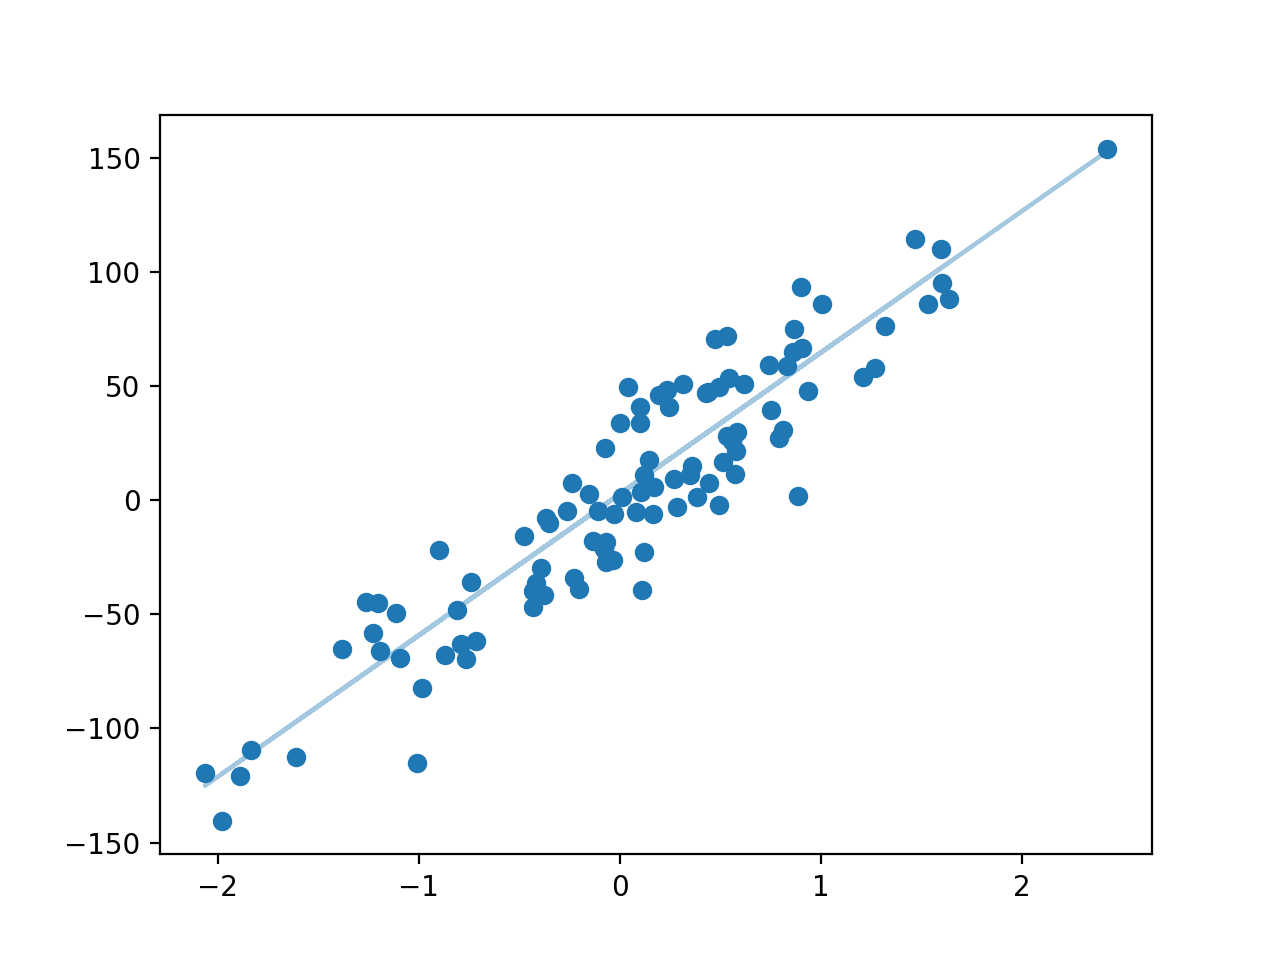

In [27]:
x_new = np.array([[0],[2]])
y_pred = linreg.predict(x_new)
plt.scatter(X,y)
plt.plot(X,linreg.intercept_ + X*linreg.coef_,alpha=0.4)